## Multi-class classification

This exercise is described in [ex3.pdf](data/ml-ex3/ex3.pdf).

In [1]:
import numpy as np
import scipy as sp
import scipy.io as sio
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report

%matplotlib inline

### Hand-written digits dataset

In [2]:
# Load the hand-written digits dataset
digits = sio.loadmat('data/ml-ex3/ex3data1.mat')

There are 5000 training examples in ex3data1.mat, where each training
example is a **20 pixel by 20 pixel grayscale image** of the digit. Each pixel is represented by a foating point number indicating the grayscale intensity at
that location. The 20 by 20 grid of pixels is "unrolled" into a **400-dimensional** vector. Each of these training examples becomes a single row in our data matrix X. This gives us a **5000 by 400 matrix X** where every row is a training example for a handwritten digit image.

In [3]:
# Digit image data (5000 images with 400 features/pixels)
X = digits['X']

# Digit classes (1-10) where digit 0 is assigned class 10
# 5000-dimensional vector y that contains labels for the training set
y = digits['y'].ravel()

In [7]:
X.shape, y.shape

((5000, 400), (5000,))

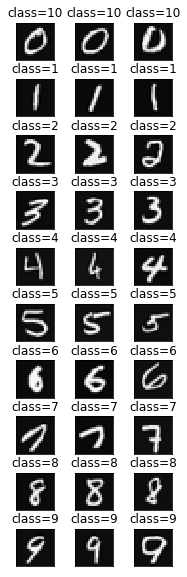

In [11]:
# Plot three samples from each class
n_rows = 10
n_cols = 3

# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0
# Return evenly spaced numbers over a specified interval.
selected = np.linspace(0, X.shape[0] - 1, n_rows * n_cols, dtype='int16')

plt.figure(figsize=(n_cols, n_rows))
plt.subplots_adjust(hspace=.5)

for i, idx in enumerate(selected):
    plt.subplot(n_rows, n_cols, i + 1)
    # reshape 400 data points to 20x20
    plt.imshow(X[idx].reshape((20,20), order='F'), cmap=plt.cm.gray)
    plt.title(f'class={y[idx]}')
    plt.xticks(())
    plt.yticks(())

### Logistic regression

In [12]:
# Train a logistic regression classifier with C=1.0 (inverse regularization strength)
# 'fmincg' in Octave
clf = LogisticRegression(C=1.0, solver='newton-cg')
clf.fit(X, y)

LogisticRegression(solver='newton-cg')

In [13]:
# Classification accuracy on training set
clf.score(X, y)

0.9624

In [14]:
# Train a logistic regression classifier, running 
# built-in cross validation for selecting the best 
# C value 
clf_cv = LogisticRegressionCV(Cs=[1e-1, 1e0, 1e1], solver='newton-cg')
clf_cv.fit(X, y)

LogisticRegressionCV(Cs=[0.1, 1.0, 10.0], solver='newton-cg')

In [15]:
# Classification accuracy on training set 
# using the model that was selected during 
# cross-validation
clf_cv.score(X, y)

0.9624

### Neural networks

You have been provided with a set of network parameters ($ \theta $(1);$ \theta $(2)) already trained by us (Instructor). These are stored in ex3weights.mat and will be loaded by ex3 nn.m into Theta1 and Theta2 The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

In [16]:
# Load the parameters of a pre-trained neural network
weights = sio.loadmat('data/ml-ex3/ex3weights.mat')

Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

Theta1.shape, Theta2.shape

((25, 401), (10, 26))

In [17]:
# Number of examples (first dimension of design matrix X)
n_examples = X.shape[0]

# sigmoid function
sigmoid = sp.special.expit

### Feedforward Propagation and Prediction

In [18]:
# Input layer data
A1 = np.c_[np.ones(n_examples), X]
A1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [19]:
# Hidden layer activations
Z2 = A1.dot(Theta1.T)
A2 = np.c_[np.ones(n_examples), sigmoid(Z2)]

In [28]:
# Output layer activations
Z3 = A2.dot(Theta2.T)
A3 = sigmoid(Z3)
print(A3.shape)

(5000, 10)


In [29]:
# Predicted class is index of highest value per row + 1
y_pred = np.argmax(A3, axis=1) + 1
y_pred.shape

(5000,)

In [38]:
# Print classification report showing the main classification metrics
print(classification_report(y, y_pred, target_names=['1','2','3','4','5','6','7','8','9','10'], digits=4))

             precision    recall  f1-score   support

          1     0.9684    0.9820    0.9752       500
          2     0.9818    0.9700    0.9759       500
          3     0.9776    0.9600    0.9687       500
          4     0.9699    0.9680    0.9690       500
          5     0.9723    0.9840    0.9781       500
          6     0.9782    0.9860    0.9821       500
          7     0.9778    0.9700    0.9739       500
          8     0.9781    0.9820    0.9800       500
          9     0.9657    0.9580    0.9618       500
         10     0.9822    0.9920    0.9871       500

avg / total     0.9752    0.9752    0.9752      5000

